#Α. Στοιχεία ομάδας

# Β. Εισαγωγή του dataset

1)

In [0]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (18.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.1)
    100% |████████████████████████████████| 8.9MB 3.3MB/s 
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
    100% |████████████████████████████████| 13.9MB 3.1MB/s 
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [0]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_csv("dermatology.data", header=None) 

Saving dermatology.data to dermatology.data
User uploaded file "dermatology.data" with length 25964 bytes


In [0]:
df = pd.read_csv("dermatology.data", header=None) 
print(df.head())
print(df.shape)
print(df.dtypes)

   0   1   2   3   4   5   6   7   8   9  ...  25  26  27  28  29  30  31  32  \
0   2   2   0   3   0   0   0   0   1   0 ...   0   0   3   0   0   0   1   0   
1   3   3   3   2   1   0   0   0   1   1 ...   0   0   0   0   0   0   1   0   
2   2   1   2   3   1   3   0   3   0   0 ...   0   2   3   2   0   0   2   3   
3   2   2   2   0   0   0   0   0   3   2 ...   3   0   0   0   0   0   3   0   
4   2   3   2   2   2   2   0   2   0   0 ...   2   3   2   3   0   0   2   3   

   33  34  
0  55   2  
1   8   1  
2  26   3  
3  40   1  
4  45   3  

[5 rows x 35 columns]
(366, 35)
0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
17     int64
18     int64
19     int64
20     int64
21     int64
22     int64
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
31   

2) δείγματα: 366, χαρακτηριστικά: 33. Τελευταία στήλη είναι οι ετικέτες. Το είδος των χαρακτηριστικών είναι int64 για όλα εκτός του 33ου που είναι object. Αυτό το χαρακτηριστικό είναι η ηλικία (age) του ανθρώπου-δείγματος και υποθέτουμε ότι είναι τύπου object λόγω του ότι σε κάποια δείγματα έχει τιμή '?' που συμβολίζει άγνωστη ηλικία.
Δεν υπάρχουν διατεταγμένα χαρακτηριστικά (ΤΣΕΚ χαραξτηρικα)

3) Εκτυπώνοντας μέρος των δεδομένων παρατηρούμε ότι δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών.

In [0]:
np_data = df.values
print("rows:",len(np_data))
print("columns:",len(np_data[0]))

data = np_data[:,0:-1]
print(data.shape)
dataTargets = np_data[:,-1].astype(int) #gia na doulepsei h bincount prpei na einai int ta targets
print(dataTargets.shape)
frequencies = np.bincount(dataTargets) 
frequencies = frequencies[1:] #Το frequencies[0] που αντιστοιχεί στην τιμή 0 δεν έχει νόημα γιατί τα targets μας παίρνουν τιμές από 1-6.
print("frequencies:", frequencies)

rows: 366
columns: 35
(366, 34)
(366,)
frequencies: [112  61  72  49  52  20]



4) Με βάση την περιγραφή του data set οι ετικέτες είναι η τελευταία στήλη (στήλη 34). Οι ετικέτες παίρνουν τιμές 1-6 και αντιστοιχούν στα εξής:

1 -> psoriasis

2 -> seboreic dermatitis

3 -> lichen planus

4 -> pityriasis rosea

5 -> cronic dermatitis

6 -> pityriasis rubra pilaris

5) Δεν χρειάστηκε να κάνουμε αλλαγές στο αρχείο δεδομένων, πέρα από τον διαχωρισμό των δεδομένων σε target και data.????????????????????

In [0]:
print((np_data=='?').sum()) #Απουσιάζουσες στην ηλικία


print("rows:",len(np_data))
print("columns:",len(np_data[0]))

print(df.shape)
print(df.dropna(axis=0).shape) #Έλεγχος για άλλες απουσιάζουσες (Nan)

8
rows: 366
columns: 35
(366, 35)
(366, 35)


6) Από την περιγραφή του data set, οι απουσιάζουσες τιμές, που έχουν όμως καταγραφεί, και αφορούν την ηλικία δηλώνονται με '?'. Με τον παραπάνω κώδικα βλέπουμε ότι είναι 8 σε πλήθος (επιβεβαιώνεται η πληροφορία και από την περιγραφή του data set).

Ακόμα, χρησιμοποιούμε τη συνάρτηση dropna σε μία από τις 2 διαστάσεις (εδώ επιλέγουμε τυχαία axis=0) και συγκρίνουμε τις διαστάσεις του προκύπτοντως με τον αρχικό πίνακα για να ελέγξουμε αν υπάρχουν επιπλέον απουσιάζουσες τιμές. Συμπεραίνουμε ότι δεν υπάρχουν άλλες απουσιάζουσες τιμές.

In [0]:
print("Ποσοστό δειγμάτων με απουσιάζουσες τιμές επί του συνόλου: ", (np_data=='?').sum()/df.shape[0])

Ποσοστό δειγμάτων με απουσιάζουσες τιμές επί του συνόλου:  0.02185792349726776


In [0]:
print("Ποσοστό των δειγμάτων του συνόλου ανά κλάση: ")
derma_names = {1:'psoriasis', 2:'seboreic dermatitis', 3:'lichen planus', 4:'pityriasis rosea', 5:'cronic dermatitis', 6:'pityriasis rubra pilaris'}
allF = frequencies.sum()
for k,v in derma_names.items():
  print(k, " - ", v, ": ", frequencies[k-1]/allF*100, "%")

Ποσοστό των δειγμάτων του συνόλου ανά κλάση: 
1  -  psoriasis :  30.601092896174865 %
2  -  seboreic dermatitis :  16.666666666666664 %
3  -  lichen planus :  19.672131147540984 %
4  -  pityriasis rosea :  13.387978142076504 %
5  -  cronic dermatitis :  14.207650273224044 %
6  -  pityriasis rubra pilaris :  5.46448087431694 %


7) Το ποσοστό των δειγμάτων του συνόλου ανά κλάση φαίνεται παραπάνω.

Επίσης παρατηρούνται πολλές δυάδες κλάσεων που η μία είναι πάνω από 1.5 φορές συχνότερη από την άλλη, όπως για παράδειγμα οι 1 και 4 όπου η 1 είναι 0.3060/0.1338 = 2.2870 φορές συχνότερη από τη 2. Επομένως το data set είναι imbalanced.


8) Λόγω του ότι το data set είναι ιατρικό και θέλουμε ευαισθησία στην ηλικία επειδή παίζει σημαντικό ρόλο σε ζητήματα υγείας και του ότι τα δείγματα με απουσιάζουσες τιμές είναι μόνο 8 (δηλαδή το 2.2%), επιλέγουμε να τα αφαιρέσουμε αντί να χρησιμοποιήσουμε έναν imputer που θα διατηρήσει τα δείγματα και θα αντικαταστήσει την εκλείπουσα ηλικία με π.χ. τη μέση τιμή των ηλικιών. Η αφαίρεση θα γίνει πριν το διαχωρισμό του test από το train set όπως είναι ορθότερο. Επιπλέον, εφόσων δεν υπήρχαν ονοματικά δεδομένα που θα έπρεπε να μετατρέψουμε σε αριθμούς ή σε δυαδική μορφή, δεν απαιτείται άλλη επεξεργασία.

In [0]:
from sklearn.model_selection import train_test_split

#df.dropna(axis=0) #κρατάμε μόνο τα δείγματα με αριθμητικές τιμές
print("μέγεθος πίνακα πρίν την αφαίρεση:" ,df.shape)
df = df[df[33]!="?"] #33 είναι η στήλη για την ηλικία
df_correct = df
df_correct[33]=df[33].astype(int) #η στήλη της ηλικίας δεν είναι int, την μετατρέπω αφού αφαιρέσω τα στοιχεία με '?'
print("μέγεθος πίνακα μετά την αφαίρεση για επιβεβαίωση ότι έχουν διαγραφεί 8 γραμμές:", df_correct.shape)
print(df_correct.dtypes)

np_data = df_correct.values

##np_data=[x for x in np_data if '?' not in x]
data = np_data[:,0:-1]
data_labels = np_data[:,-1].astype(int)

train, test, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.20) 

μέγεθος πίνακα πρίν την αφαίρεση: (366, 35)
μέγεθος πίνακα μετά την αφαίρεση για επιβεβαίωση ότι έχουν διαγραφεί 8 γραμμές: (358, 35)
0     int64
1     int64
2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
dtype: object


# Γ. Baseline classification

In [0]:
#Dummy Classifiers

from sklearn.dummy import DummyClassifier

#Δημιουργία - ορισμός των dummy classifiers
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_constant_3 = DummyClassifier(strategy="constant", constant=3)
dc_constant_4 = DummyClassifier(strategy="constant", constant=4)
dc_constant_5 = DummyClassifier(strategy="constant", constant=5)
dc_constant_6 = DummyClassifier(strategy="constant", constant=6)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

derma_pred = {}

#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc_uniform.fit(train, train_labels)
derma_pred['uniform (random)'] = dc_uniform.predict(test)
model = dc_constant_1.fit(train, train_labels)
derma_pred['constant 1'] = dc_constant_1.predict(test)
model = dc_constant_2.fit(train, train_labels)
derma_pred['constant 2'] = dc_constant_2.predict(test)
model = dc_constant_3.fit(train, train_labels)
derma_pred['constant 3'] = dc_constant_3.predict(test)
model = dc_constant_4.fit(train, train_labels)
derma_pred['constant 4'] = dc_constant_4.predict(test)
model = dc_constant_5.fit(train, train_labels)
derma_pred['constant 5'] = dc_constant_5.predict(test)
model = dc_constant_6.fit(train, train_labels)
derma_pred['constant 6'] = dc_constant_6.predict(test)
model = dc_most_frequent.fit(train, train_labels)
derma_pred['most frequent label'] = dc_most_frequent.predict(test)
model = dc_stratified.fit(train, train_labels)
derma_pred['stratified'] = dc_stratified.predict(test)

In [0]:
#Gaussian Classifier

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
#Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
derma_pred['gaussian naive bayes'] = gnb.predict(test)

In [0]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train, train_labels)
#Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
derma_pred['knn'] = knn.predict(test)
#print(derma_pred['gaussian naive bayes'])

Μέχρι εδώ έχουμε τα predictions όλων των classifiers στο λεξικό derma_pred. Στη συνέχεια θα υπολογίσουμε τις μετρικές f1_micro average και f1_macro average. 

In [0]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

micro_avg_f1 = []
macro_avg_f1 = [] 

print("<classifier> - <average_type>: (<precision>, <recall>, <f1_score>, None)\n")
for classifier, pred in derma_pred.items():
    # εκτυπώνουμε τa precision, recall και F1 λαμβάνοντας υπόψη συνολικά (αθροίζοντας εκτός κλάσεων (globaly)) τα δείγματα (average = micro).
    avg = precision_recall_fscore_support(test_labels, pred, average='micro')
    micro_avg_f1.append(avg[2])
    print(classifier, " - micro: ", avg)
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρώντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro) <- για καθε κλαση!! εδω γιατι εχω μονο 1 αριθμο;
    avg = precision_recall_fscore_support(test_labels, pred, average='macro')
    macro_avg_f1.append(avg[2])
    print(classifier, " - macro: ", avg, "\n")
    
    #print(classification_report(test_labels, pred))

<classifier> - <average_type>: (<precision>, <recall>, <f1_score>, None)

uniform (random)  - micro:  (0.1388888888888889, 0.1388888888888889, 0.1388888888888889, None)
uniform (random)  - macro:  (0.14939458689458687, 0.15544871794871795, 0.13302669552669555, None) 

constant 1  - micro:  (0.3333333333333333, 0.3333333333333333, 0.3333333333333333, None)
constant 1  - macro:  (0.05555555555555555, 0.16666666666666666, 0.08333333333333333, None) 

constant 2  - micro:  (0.1388888888888889, 0.1388888888888889, 0.1388888888888889, None)
constant 2  - macro:  (0.02314814814814815, 0.16666666666666666, 0.04065040650406505, None) 

constant 3  - micro:  (0.16666666666666666, 0.16666666666666666, 0.16666666666666666, None)
constant 3  - macro:  (0.027777777777777776, 0.16666666666666666, 0.047619047619047616, None) 

constant 4  - micro:  (0.18055555555555555, 0.18055555555555555, 0.18055555555555555, None)
constant 4  - macro:  (0.03009259259259259, 0.16666666666666666, 0.05098039215686274,

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Συνεχίζουμε με τον υπολογισμό του confusion matrix.


In [0]:
from sklearn.metrics import confusion_matrix

#print(derma_names.values(), "\n")
print("[ ", end='')
for i in range(1,6):
  print("'", derma_names[i], "'  ", end='')
print("] \n")
for classifier,pred in derma_pred.items():
  print(classifier)
  cnf_matrix = confusion_matrix(test_labels, pred)
  print(cnf_matrix)
  print("\n")

[ ' psoriasis '  ' seboreic dermatitis '  ' lichen planus '  ' pityriasis rosea '  ' cronic dermatitis '  ] 

uniform (random)
[[3 5 5 3 4 4]
 [2 0 3 1 3 1]
 [1 1 2 0 4 4]
 [2 0 4 4 1 2]
 [3 3 2 1 0 1]
 [1 1 0 0 0 1]]


constant 1
[[24  0  0  0  0  0]
 [10  0  0  0  0  0]
 [12  0  0  0  0  0]
 [13  0  0  0  0  0]
 [10  0  0  0  0  0]
 [ 3  0  0  0  0  0]]


constant 2
[[ 0 24  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  3  0  0  0  0]]


constant 3
[[ 0  0 24  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  3  0  0  0]]


constant 4
[[ 0  0  0 24  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  3  0  0]]


constant 5
[[ 0  0  0  0 24  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  3  0]]


constant 6
[[ 0  0  0  0  0 24]
 [ 0  0  0  0  0 10]
 [ 0  0  0  0  0 12]
 [ 0  

**3) Σχολιασμός confusion matrix:**

Αρχικά επισημαίνουμε ότι κάθε γραμμή ενός confusion matrix αντιστοιχίζεται σε μία κατηγορία ετικετών. Τα στοιχεία εκτός διαγωνίου σε κάθε γραμμή είναι λάνθασμένα αρνητικά, δηλαδή δεν κατηγοριοποιήθηκαν στην κατηγορία της γραμμής ενώ ανήκαν. Άρα με παρατήρηση των γραμμών εξετάζω το recall. Αντίστοιχα, κάθε στήλη ενός confusion matrix αντιστοιχίζεται επίσης σε μία κατηγορία ετικετών. Τα στοιχεία εκτός διαγωνίου σε κάθε στήλη είναι λάνθασμένα θετικά, δηλαδή κατηγοριοποιήθηκαν στην κατηγορία της στήλης ενώ δεν ανήκαν. Άρα με παρατήρηση των στηλών εξετάζω το precision.
\

\
**uniform (random):**

Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) τιμές σχεδόν σε όλα τα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί τυχαία, με ομοιόμορφη πιθανότητα τα δείγματα του test set σε κλάσεις.

\
**constant_x:**

Σε κάθε πίνακα constant_x όλα τα δείγματα έχουν ταξινομηθεί στην κλάση x και γι' αυτό οι μόνες μη μηδενικες τιμές στον πίνακα είναι η στήλη x. Αυτό μας δίνει κακό precision και recall σε όλες τις κλάσεις εκτός της κλάσης x όπου το precision αναμένεται πολύ μικρό αλλά το recall αναμένεται μέγιστο, δηλαδή 1. Π.χ., στον πίνακα του contant_1 η γραμμή 1 έχει μηδενικά όλα τα στοιχεία εκτός διαγωνίου (βέλτιστο recall), ενώ η στήλη 1 έχει παντού μη μηδενικά στοιχεία (κακό precision).

\
**most frequent label:**

Ο ταξινομητής αυτός είναι ίδιος με τον  constant_x, όπου x είναι η πιο συχνά εμφανιζόμενη κλάση στο train set. Επομένως ίσχυουν τα ίδια σχόλια με πριν. Μπορούμε να πούμε ότι αυτός ο ταξινομητής είναι ό,τι καλύτερο μπορεί να πετύχει ένα constant ταξινομητής.

\
**stratified:**

Συγκρίνουμε τον πίνακα stratified με τον uniform. Ο πίνακας stratified έχει περισσότερα στοιχεία εκτός διαγωνίου που είναι μηδενικά, κάτι που δηλώνει ότι μάλλον λιγότερα στοιχεία έχουν ταξινομηθεί λάθος. Επίσης, το άθροισμα στα στοιχεία διαγωνίου του stratified είναι σχεδόν διπλάσιο από αυτό του uniform, δηλαδή σχεδόν τα διπλάσια στοιχεία έχουν ταξινομηθεί σωστά. Οι βελτιώσεις οφείλονται στο ότι τώρα, ναι μεν τα δείγματα ταξινομούνται τυχαία, αλλά διατηρείται η κατανομή των κλάσεων που υπήρχε στο train set.

\
**gaussian naive bayes:**

Ο πίνακας αυτού του ταξινομητή είναι πολύ καλός καθώς μόνο 2 κελιά εκτός διαγωνίου περιέχουν μη μηδενική τιμή. Συγκεκριμένα, στην κλάση seboreic dermatitis δεν έχουν ταξινομηθεί 11 δείγματα που ανήκαν σε αυτή. Άρα έχουμε βέλτιστο recall για όλους εκτός της κλάσης seboreic dermatitis και βέλτιστο precision εκτός των κλάσεων pityriasis rubra pilaris και pityriasis rosea όπου έχουν ταξινομηθεί λάθος τα 11 δείγματα της seboreic dermatitis. Αυτό σημαίνει ότι ο ταξινομητής έχει προσεγγίσει πολύ καλά το data set και ότι οι υποθέσεις μας περί ανεξαρτησίας δεδομένων και κανονικής κατανομής των χαρακτηριστικών περιγράφουν αρκετά καλά τις πραγματικές συνθήκες. (Βέβαια, όπως διαβάσαμε, η ανεξαρτησία των χαρακτηριστικών δεν παίζει τόσο μεγάλο ρόλο στο να ταξινομήσει ποιοτικά ο gaussian naive bayes τα δεδομένα.)

\
**knn:**


Παρατηρούμε ότι ο πίνακας του knn εχει περισσότερα μη μηδενικά κελιά εκτός διαγωνίου από τον gaussian naive bayes. Επομένως θα έχουμε χειρότερο recall και precision από πριν σε αρκετές κλάσεις. Και πάλι όμως η ταξινόμηση είναι ικανοποιητική, αν λάβουμε και υπόψιν ότι η υπερπαράμετρος k έχει επιλεγεί τυχαία από εμάς και δεν έχει υπολογισθεί η βέλτιστη. Η σχεδίαση του knn δίνει γενικά καλά αποτελέσματα λόγω του ότι βασίζεται σε μία πιο αλγοριθμική προσέγγιση και καθορίζεται από τη συμπεριφορά των γειτονικών δειγμάτων. 


\
Παρακάτω εκτυπώνουμε τα recall, precission (average = macro) για κάθε ταξινομητή για να επιβεβαιώσουμε τον σχολιασμό μας:

In [0]:
for classifier, pred in derma_pred.items():    
    print(classification_report(test_labels, pred))

             precision    recall  f1-score   support

          1       0.25      0.12      0.17        24
          2       0.00      0.00      0.00        10
          3       0.12      0.17      0.14        12
          4       0.44      0.31      0.36        13
          5       0.00      0.00      0.00        10
          6       0.08      0.33      0.12         3

avg / total       0.19      0.14      0.15        72

             precision    recall  f1-score   support

          1       0.33      1.00      0.50        24
          2       0.00      0.00      0.00        10
          3       0.00      0.00      0.00        12
          4       0.00      0.00      0.00        13
          5       0.00      0.00      0.00        10
          6       0.00      0.00      0.00         3

avg / total       0.11      0.33      0.17        72

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        24
          2       0.14      1.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Επιβεβαώνονται όντως οι σχολιασμοί μας. Επίσης σημειώνεται ότι γενικά μας απασχολεί περισσότερο το recall  σε αυτό το data set λόγω του ιατρικού του χαρακτήρα. Δηλαδή προτιμούμε να μας κατηγοριοποιήσει έναν ασθενή σε μία αρρώστια ακόμα κι αν δεν την έχει (κακό precision) από το να μην κατηγοριοποιήσει έναν ασθενή σε μία αρρώστια ενώ αυτός την έχει (κακό recall).

\
Στη συνέχεια, εκτυπώνουμε με bar-plots f1-macro και f1-micro:

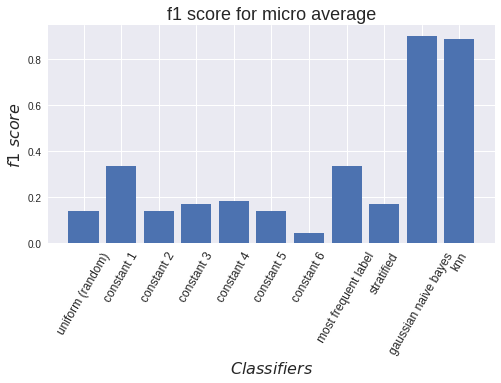

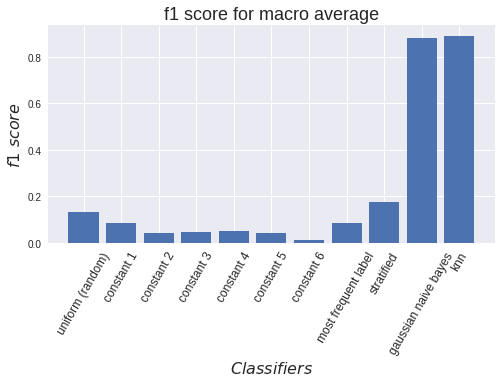

In [0]:
#Bar for f1-micro average

import matplotlib.pyplot as plt

classifiers = list(derma_pred.keys())

y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

plt.bar(y, micro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

plt.bar(y, macro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()


**Σχολιασμός f1 - plots:**

\
Στη συνέχεια σχολιάζουμε το f1 micro και macro με βάση τα plots: 

Το f1-micro βγάζει κατευθείαν μέσο όρο πάνω σε όλες τις προβλέψεις. Το f1-macro βγάζει αποτελέσματα για κάθε κλάση και μετά παίρνει μέσο όρο αυτών.  

Αρχικά, και στις δύο γραφικές οι ταξινομητές gaussian naive bayes και knn έχουν πολύ υψηλό f1 score, τόσο σε micro όσο και σε macro επίπεδο, όπως ήταν αναμενόμενο.

Οι ταξινομητές uniform και stratified δίνουν σχεδόν ίδιο f1 score τόσο σε micro όσο και σε macrο επίπεδο, διότι είναι ουσιαστικά είτε ισομοιρασμένα (uniform) είτε ομοιόμορφα μοιρασμένα (stratified) οπότε κάθε κλάση συνεισφέρει περίπου όσο θα συνεισέφεραν και τα στοιχεία της επί του συνόλου.

Όσο για τους υπόλοιπους ταξινομητές, σε micro επίπεδο παρατηρούμε ότι έχουν υψηλότερο f1 score από ότι σε macro. Αυτό συμβαίνει επειδή στην macro περίπτωση κάθε κλάση συνεισφέρει το ίδιο στο f1 score, ανεξάρτητα με το πόσα δείγματα ανήκουν σε αυτήν. Αντίθετα, στη micro περίπτωση οι κλάσεις συνεισφέρουν ανάλογα με το ποσοστό των δειγμάτων που ανήκουν σε αυτές επί του συνόλου. Άρα, για τον constant_1 ταξινομητή, που τα στοιχεία της κλάσης 1 ήταν 21 (21/72 = 29,2%) το f1 score για micro είναι μεγαλύτερο από ότι για macro. Αντίστοιχα συμβαίνει και για τους άλλους constant ταξινομητές και τον most frequent.


\
Συμπερασματικά, εμάς μας ενδιαφέρει περισσότερο το macro f1 score, διότι αρχικά δεν ξέρουμε πώς θα είναι μοιρασμένα τα δεδομένα στο test set και θα είναι λάθος να κρίνουμε την απόδοση ενός ταξινομητή με βάση τα ποσοστά των δειγμάτων στις κλάσεις του train set. Επίσης, γενικά η macro προσέγγιση είναι αντιπροσωπευτική διότι θέλουμε balanced data sets, στα οποία έχουμε σχεδόν ισάριθμα δεδομένα από κάθε κλάση.


\
**ΕΡΩΤΗΣΗ: να αλλαξουμε το f1 δινοντας βαρος παραπνω στο recall λογω ιατρικου dataset?**

#Δ. Βελτιστοποίηση ταξινομητών

Σε αυτό το μέρος θα βελτιστοποιήσουμε τον ταξινομητή knn που περιγράφηκε παραπάνω, τον οποίο θα εφαρμόσουμε πάνω σε προεπεξεγρασμένα δεδομένα. Συγκεκριμένα, στα δεδομένα του Γ. ερωτήματος (έχουν αφαιρεθεί τα δείγματα με missing values) θα εφαρμόσουμε:

α) κανονικοποίηση χαρακτηριστικών, κυρίως λόγω του ότι η ηλικία έχει πολύ μεγαλύτερες τιμές από τα άλλα χαρακτηριστικά. Θα δοκιμάσουμε και κανονικοποίηση min-max ([0,1]) ώστε να μπορούμε να χρησιμοποιήσουμε το variance threshold στο επόμενο βήμα.

β) μείωση διάστασης με επιλογή χαρακτηριστικών (μέθοδος variance threshold ) 

γ) εξισσορόπηση, καθώς από τις πρώτες μετρήσεις στα δείγματα είχαμε αποφανθεί ότι το data set είναι imbalanced. 

Όλες οι διεργασίες θα πραγματοποιηθούν στο train set. 

In [0]:
# a) Normalization

from sklearn import preprocessing

#Uniform [0,1]
min_max_scaler = preprocessing.MinMaxScaler()
train_minmax = min_max_scaler.fit_transform(train)
print("train_minmax:\n", train_minmax, "\n")
test_minmax = min_max_scaler.transform(test)
print("test_minmax:\n", test_minmax) #στο test set μπορεί οι τιμές να μην είναι στο [0,1], αφού ο MinMaxScaler εκπαιδεύτηκε μόνο στο trainset και το test set μπορεί να έχει κάποια μεγαλύτερη τιμή
print("\nΥπάρχουν τιμές μεγαλύτερες του 1 στο test set;\n", np.argwhere(test_minmax > 1))

train_minmax:
 [[0.66666667 1.         0.66666667 ... 0.66666667 0.         0.73333333]
 [0.66666667 0.33333333 1.         ... 0.66666667 1.         0.66666667]
 [0.66666667 0.66666667 0.66666667 ... 1.         0.         0.53333333]
 ...
 [1.         0.66666667 0.33333333 ... 0.66666667 0.         0.48      ]
 [0.33333333 0.33333333 0.66666667 ... 0.66666667 1.         0.65333333]
 [0.33333333 0.33333333 0.66666667 ... 0.66666667 1.         0.66666667]] 

test_minmax:
 [[1.         0.33333333 0.66666667 ... 1.         1.         0.21333333]
 [0.33333333 0.33333333 0.         ... 0.66666667 0.         0.8       ]
 [0.66666667 1.         0.66666667 ... 0.66666667 0.         0.57333333]
 ...
 [0.66666667 0.66666667 1.         ... 1.         0.         0.76      ]
 [0.66666667 0.66666667 0.66666667 ... 0.33333333 0.         0.21333333]
 [0.66666667 0.33333333 0.66666667 ... 0.33333333 0.         0.53333333]]

Υπάρχουν τιμές μεγαλύτερες του 1 στο test set;
 []


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
# b) Variance Threshold

train_var = np.var(train_minmax, axis=0) #Υπολογισμός variances για να δούμε τι θα κόψουμε
print(len(train_var)) #Επιβεβαίωση σωστής διάστασης πίνακα
print(train_var)

34
[0.04725577 0.05416184 0.08939448 0.14015491 0.09206237 0.1069653
 0.03906195 0.07844584 0.10915638 0.09448981 0.09664287 0.08617237
 0.03993166 0.07390744 0.07694074 0.1373933  0.04959221 0.06424791
 0.09722969 0.12734119 0.14950609 0.12205976 0.05567374 0.06797534
 0.08533425 0.08914861 0.10225982 0.13985606 0.10542895 0.02425003
 0.03038589 0.0508365  0.14199146 0.04156285]


Παρατηρούμε ότι κανένα χαρακτηριστικό δεν έχει μηδενικό variance οπότε επιλέγουμε να αφαιρέσουμε αυτά με var < 0.045.

In [0]:
from sklearn.feature_selection import VarianceThreshold

# αρχικοποιούμε έναν selector που κόβει τα χαρακτηριστικά με var<0.045 (επιλογή σύμφωνα με τον παραπάνω πίνακα vars)
selector = VarianceThreshold(0.045)
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train_minmax)
print(train_reduced.shape)

#μάσκα: ποια χαρακτηριστικά κρατάει ή όχι ο selector 
#mask = selector.get_support()
#print(mask)

#διατήρηση αυτών των χαρακτηριστικών και στο test set μέσω της selector.transform
test_reduced = selector.transform(test_minmax)
print(test_reduced.shape)

(286, 29)
(72, 29)


Όπως φαίνεται έχουν κοπεί 5 χαρακτηριστικά, αυτά με var<0.045

In [0]:
#Standarized

# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
standard_scaler = preprocessing.StandardScaler().fit(train)

#standardization των features του training set
#train_standard = preprocessing.scale(train)
train_standard = standard_scaler.transform(train)
print(train_standard)
# και τυπώνουμε τη μέση τιμη και απόκλιση του test set 
print("Train set μ = ", train_standard.mean(axis=0))
print("Train set σ = ", train_standard.std(axis=0))

# εφαρμόζουμε τον scaler στα δεδομένα test.
test_standard = standard_scaler.transform(test)
print(test_standard)
# και τυπώνουμε τη μέση τιμη και απόκλιση του test set 
print("Test set μ = ", test_standard.mean(axis=0))
print("Test set σ = ", test_standard.std(axis=0))

#????????? perierga apotelesmata

[[-0.13939867  1.73277466  0.47947113 ...  0.15507656 -0.516533
   1.25588699]
 [-0.13939867 -1.13181235  1.59433897 ...  0.15507656  2.13727128
   0.92888073]
 [-0.13939867  0.30048116  0.47947113 ...  1.63347308 -0.516533
   0.2748682 ]
 ...
 [ 1.39398666  0.30048116 -0.63539671 ...  0.15507656 -0.516533
   0.01326319]
 [-1.67278399 -1.13181235  0.47947113 ...  0.15507656  2.13727128
   0.86347948]
 [-1.67278399 -1.13181235  0.47947113 ...  0.15507656  2.13727128
   0.92888073]]
Train set μ =  [-2.63969111e-17  1.52170429e-16 -5.90048601e-17 -8.54017711e-17
  1.19562480e-16  1.91765795e-16 -6.79332270e-17  5.74521006e-17
  5.35702019e-17 -2.56205313e-17  1.66145264e-16  8.07434927e-17
  1.59157846e-17  4.42536450e-17 -9.31655685e-18 -3.88189869e-18
  1.42417158e-17  7.22033156e-17  9.62710875e-17 -2.56205313e-17
  7.22033156e-17  8.07434927e-17  6.48277081e-17  2.17386327e-16
  1.78567340e-16  2.48441516e-17 -1.28879036e-16 -2.25150124e-17
  2.79496706e-17  3.88189869e-17  1.37807403

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
# c) Balancing

print(frequencies)

[112  61  72  49  52  20]


In [0]:
!pip install -U scipy imbalanced-learn

Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.1.0)
    100% |████████████████████████████████| 174kB 7.1MB/s 
    100% |████████████████████████████████| 5.4MB 6.0MB/s 
  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [1]:
import sklearn; print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 0.19.2


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
import scipy
import sklearn
from imblearn.over_sampling import RandomOverSampler


# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler(random_state=0)
# o RandomOverSampler θέλει τις ετικέτες όχι ως δυαδικό διάνυσμα αλλά ως αριθμό κλάσης. 

#tmplabels = np.asarray(mlb.inverse_transform(C_trainDataTargets)).flatten()
train_resampled, train_labels_resampled = ros.fit_sample(train_reduced, train_labels)
# ξαναφέρνουμε τα labels σε binary μορφή
#trainTargets_resampled = mlb.transform(trainTargets_resampled)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print(train_resampled.shape)
print(train_labels_resampled.shape)
# επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή
print(train_labels_resampled)
# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
new_frequencies = np.bincount(train_labels_resampled) 
print(new_frequencies) #πλήθος ανα κλάση 


ImportError: ignored

In [0]:
!pip3 install scipy

    100% |████████████████████████████████| 31.2MB 1.2MB/s 
